In [23]:
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_recall_fscore_support

results = pd.read_json(
    "C:\\workspace\\learning\\jbcs2025\\outputs\\2025-03-16\\14-59-33\\sabia-3-zero-shot-C1_inference_results.jsonl",
    lines=True,
)

In [2]:
results.head()

,id,id_prompt,essay_text,label,grade_index,reference,thinking_text,justificativa,pontuacao
0,7.html,o-brasil-e-os-imigrantes-no-mundo-contemporaneo,É indubitável que à polêmica acerca de imigran...,120,0,grader_a,,A redação apresenta domínio mediano da modalid...,120
1,17.html,agrotoxicos-ou-defensivos-agricolas-dois-nomes...,Em meio a esta discussão para definir um nome ...,160,0,grader_a,,A redação demonstra um bom domínio da modalida...,160
2,4.html,qualificacao-e-o-futuro-do-emprego,À medida que a humanidade se torna mais consci...,120,0,grader_b,,A redação demonstra um bom domínio da modalida...,160
3,5.html,agrotoxicos-ou-defensivos-agricolas-dois-nomes...,A forma como determinados métodos ou produtos ...,160,0,grader_b,,A redação demonstra um bom domínio da modalida...,160
4,3.html,qualificacao-e-o-futuro-do-emprego,"O mercado de trabalho está sofrendo mudanças, ...",120,0,grader_b,,A redação apresenta domínio mediano da modalid...,120


In [3]:
true_labels = results["label"]
preds = results["pontuacao"]

In [5]:
display(true_labels.value_counts())
display(preds.value_counts())

label
120    66
160    51
200    10
80     10
0       1
Name: count, dtype: int64

pontuacao
120    64
160    54
80     12
40      6
200     2
Name: count, dtype: int64

In [6]:
from sklearn.metrics import accuracy_score, f1_score

In [7]:
accuracy_score(true_labels, preds)

0.6739130434782609

In [41]:
f1_score(true_labels, preds, average="macro", zero_division=np.nan)

0.32524697524697527

In [20]:
# Get all classes present in either series
classes = sorted(set(preds.unique()) | set(true_labels.unique()))

metrics = {}

for cls in classes:
    # True Positives: predicted and true label are both cls.
    tp = ((preds == cls) & (true_labels == cls)).sum()
    # False Positives: predicted as cls but true label is not cls.
    fp = ((preds == cls) & (true_labels != cls)).sum()
    # False Negatives: true label is cls but prediction is not cls.
    fn = ((preds != cls) & (true_labels == cls)).sum()
    # True Negatives: neither prediction nor true label is cls.
    tn = ((preds != cls) & (true_labels != cls)).sum()

    precision = tp / (tp + fp)
    recall = tp / (tp + fn)

    f1 = 2 * (precision * recall) / (precision + recall)

    metrics[cls] = {
        "TP": tp,
        "FP": fp,
        "FN": fn,
        "TN": tn,
        "precision": precision,
        "recall": recall,
        "F1": f1,
    }

# Display the results
print("Metrics by class:")
for cls, metric in metrics.items():
    print(f"Class {cls}: {metric}")

Metrics by class:
Class 0: {'TP': np.int64(0), 'FP': np.int64(0), 'FN': np.int64(1), 'TN': np.int64(137), 'precision': np.float64(nan), 'recall': np.float64(0.0), 'F1': np.float64(nan)}
Class 40: {'TP': np.int64(0), 'FP': np.int64(6), 'FN': np.int64(0), 'TN': np.int64(132), 'precision': np.float64(0.0), 'recall': np.float64(nan), 'F1': np.float64(nan)}
Class 80: {'TP': np.int64(3), 'FP': np.int64(9), 'FN': np.int64(7), 'TN': np.int64(119), 'precision': np.float64(0.25), 'recall': np.float64(0.3), 'F1': np.float64(0.2727272727272727)}
Class 120: {'TP': np.int64(50), 'FP': np.int64(14), 'FN': np.int64(16), 'TN': np.int64(58), 'precision': np.float64(0.78125), 'recall': np.float64(0.7575757575757576), 'F1': np.float64(0.7692307692307692)}
Class 160: {'TP': np.int64(39), 'FP': np.int64(15), 'FN': np.int64(12), 'TN': np.int64(72), 'precision': np.float64(0.7222222222222222), 'recall': np.float64(0.7647058823529411), 'F1': np.float64(0.7428571428571428)}
Class 200: {'TP': np.int64(1), 'FP': 

C:\Users\andrebarbosa\AppData\Local\Temp\ipykernel_50356\4248646937.py:16: RuntimeWarning: invalid value encountered in scalar divide
  precision = tp / (tp + fp)
C:\Users\andrebarbosa\AppData\Local\Temp\ipykernel_50356\4248646937.py:17: RuntimeWarning: invalid value encountered in scalar divide
  recall = tp / (tp + fn)


In [22]:
(0.27+0.77+0.74+0.17)/6

0.325

In [44]:
# Compute metrics per class; use zero_division=np.nan to propagate nans
precision, recall, f1, support = precision_recall_fscore_support(
    true_labels, preds, zero_division=np.nan, average=None
)

# Filter out the nan values and compute the average F1
valid_f1 = f1[~np.isnan(f1)]
macro_f1 = np.mean(valid_f1)
print("Macro F1 (ignoring nan):", macro_f1)

Macro F1 (ignoring nan): 0.32524697524697527


In [49]:
precision, recall, f1, support = precision_recall_fscore_support(
    true_labels, preds, zero_division=np.nan, average=None
)

print("Precision per class:", precision)
print("Recall per class:", recall)
print("F1-score per class:", f1)

Precision per class: [       nan 0.         0.25       0.78125    0.72222222 0.5       ]
Recall per class: [0.                nan 0.3        0.75757576 0.76470588 0.1       ]
F1-score per class: [0.         0.         0.27272727 0.76923077 0.74285714 0.16666667]


In [32]:
0+np.nan

nan

For some reason, sklearn is setting it as zero while it should be np.nan

In [40]:
# Compute metrics per class; use zero_division=np.nan to propagate nans
precision, recall, f1, support = precision_recall_fscore_support(
    true_labels, preds, zero_division=np.nan, average=None
)

# Filter out the nan values and compute the average F1
# For example, you might ignore classes for which support = 0 (never appears in y_true)
# or for which scikit‐learn gave you a NaN for precision/recall.
# We **keep** ∗a class if (precision is not NaN) AND (recall is not NaN) AND (support > 0).
valid_mask = (~np.isnan(precision)) & (~np.isnan(recall)) & (support > 0)
valid_f1 = f1[valid_mask]
macro_f1 = np.mean(valid_f1)
print("Macro F1 (ignoring nan):", macro_f1)

Macro F1 (ignoring nan): 0.48787046287046293


In [9]:
f1_score(true_labels, preds, average="weighted")

0.6742672786151048

In [8]:
f1_score(true_labels, preds, average="micro")

0.6739130434782609

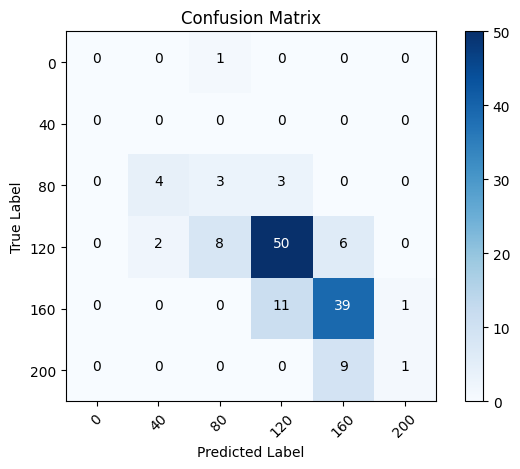

In [ ]:
class_labels = [0, 40, 80, 120, 160, 200]

cm = confusion_matrix(true_labels, preds, labels=class_labels)
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()

tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(
            j,
            i,
            format(cm[i, j], "d"),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black",
        )

plt.tight_layout()
plt.show()

In [22]:
cm

array([[ 0,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0],
       [ 0,  4,  3,  3,  0,  0],
       [ 0,  2,  8, 50,  6,  0],
       [ 0,  0,  0, 11, 39,  1],
       [ 0,  0,  0,  0,  9,  1]])

In [ ]:
3 / (4 + 3 + 3)

0.3

In [ ]:
50 / (50 + 6 + 8 + 2)

0.7575757575757576

In [ ]:
39 / (39 + 1 + 11)

0.7647058823529411

In [ ]:
1 / (1 + 9)

0.1

In [ ]:
(0 + 0 + 0.3 + 0.1 + 0.7647 + 0.75) / 6

0.31911666666666666